In [1]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import logging
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

collision solver could not be imported You may need to install CGAL and re-install tyssue


CGAL-based mesh generation utilities not found, you may need to install CGAL and build from source
C++ extensions are not available for this version


/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

/home/veronika/LymphNode/Clean version/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/home/veronika/LymphNode/Clean version/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

Topology changed!


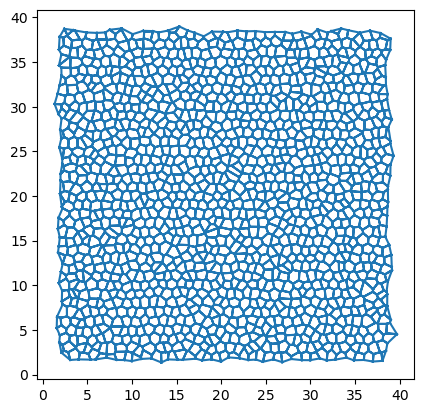

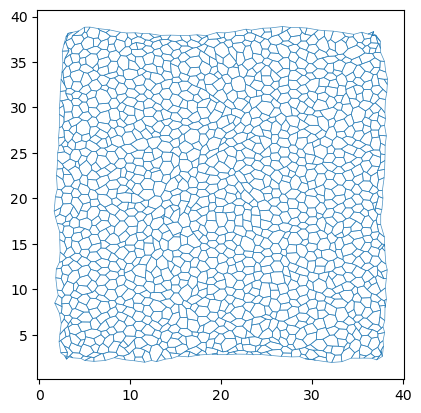

In [2]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [3]:
### match length_elasticity of opposite edges 

for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index
    


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_ECM'][edge] 
            cellmap_H.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_FRC'][edge] 
            cellmap_H.edge_df['length_elasticity'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity'][edge]
            
        
        
    
    ### match prefered_length of opposite edges 


for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['prefered_length'][opposite_edge_indices] = cellmap_H.edge_df['prefered_length'][edge] 
            

In [4]:
cellmap_H.edge_df

trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
0       13  0.452089  1.237829     3    17  1.228241  0.153768   5.042742   
1       32  0.330051  0.749065   380    31  0.623250  0.415520   8.460312   
2       31  0.453880  0.749065   343    32 -0.623250 -0.415520   9.083563   
3       48  0.437010  0.796570   343    31  0.025677 -0.796156   8.460312   
4       31  0.342726  0.796570   342    48 -0.025677  0.796156   8.485989   
...    ...       ...       ...   ...   ...       ...       ...        ...   
8150   589  0.237796  1.123647   485   580  0.027048  1.123322  37.927392   
8151   185  0.167190  0.760319   486   442 -0.248787 -0.718463   2.660166   
8152  2425  0.103527  0.622878  1007  2426  0.222142 -0.581919   2.371688   
8153  2767  0.369239  0.744999  1353  1697 -0.287851 -0.687143  12.154330   
8154  1697  0.299592  0.744999  1382  2767  0.287851  0.687143  11.866480   

             sy         tx  ...        uy        rx        ry  sub_area  \
edge                        ...                                           
0      2.271518   6.270984  ...  0.124224 -0.921667 -0.483465  0.226044   
1     11.214961   9.083563  ...  0.554719 -0.197211 -0.661044  0.165025   
2     11.630482   8.460312  ... -0.554719  0.062911  0.770189  0.226940   
3     11.214961   8.485989  ... -0.999480 -0.560339  0.354669  0.218505   
4     10.418805   8.460312  ...  0.999480  0.446475 -0.496077  0.171363   
...         ...        ...  ...       ...       ...       ...       ...   
8150  13.338058  37.954440  ...  0.999710  0.201635 -0.417584  0.118898   
8151  15.292212   2.411378  ... -0.944950 -0.122069  0.319499  0.083595   
8152  29.232143   2.593831  ... -0.934242 -0.220524  0.111643  0.051763   
8153  38.270593  11.866480  ... -0.922341 -0.284673  0.603186  0.184619   
8154  37.583450  12.154330  ...  0.922341  0.269212 -0.398139  0.149796   

      is_active  length_elasticity  prefered_length       uz  \
edge                                                           
0             1         815.903689         0.983253  0.57735   
1             1         689.252164         0.405740  0.57735   
2             1         689.252164         0.405740  0.57735   
3             1         630.453495         0.650670  0.57735   
4             1         630.453495         0.650670  0.57735   
...         ...                ...              ...      ...   
8150          1         783.548430         0.534535  0.57735   
8151          1         797.905110         0.264675  0.57735   
8152          1         789.658675         0.115555  0.57735   
8153          1         760.615210         0.819775  0.57735   
8154          1         760.615210         0.819775  0.57735   

      length_elasticity_ECM  length_elasticity_FRC  
edge                                                
0                216.599590             599.304099  
1                204.540528             484.711636  
2                204.540528             484.711636  
3                228.285242             402.168252  
4                228.285242             402.168252  
...                     ...                    ...  
8150             264.457655             519.090775  
8151             218.306354             579.598756  
8152             231.940537             557.718138  
8153             277.083177             483.532033  
8154             277.083177             483.532033  

[8155 rows x 24 columns]

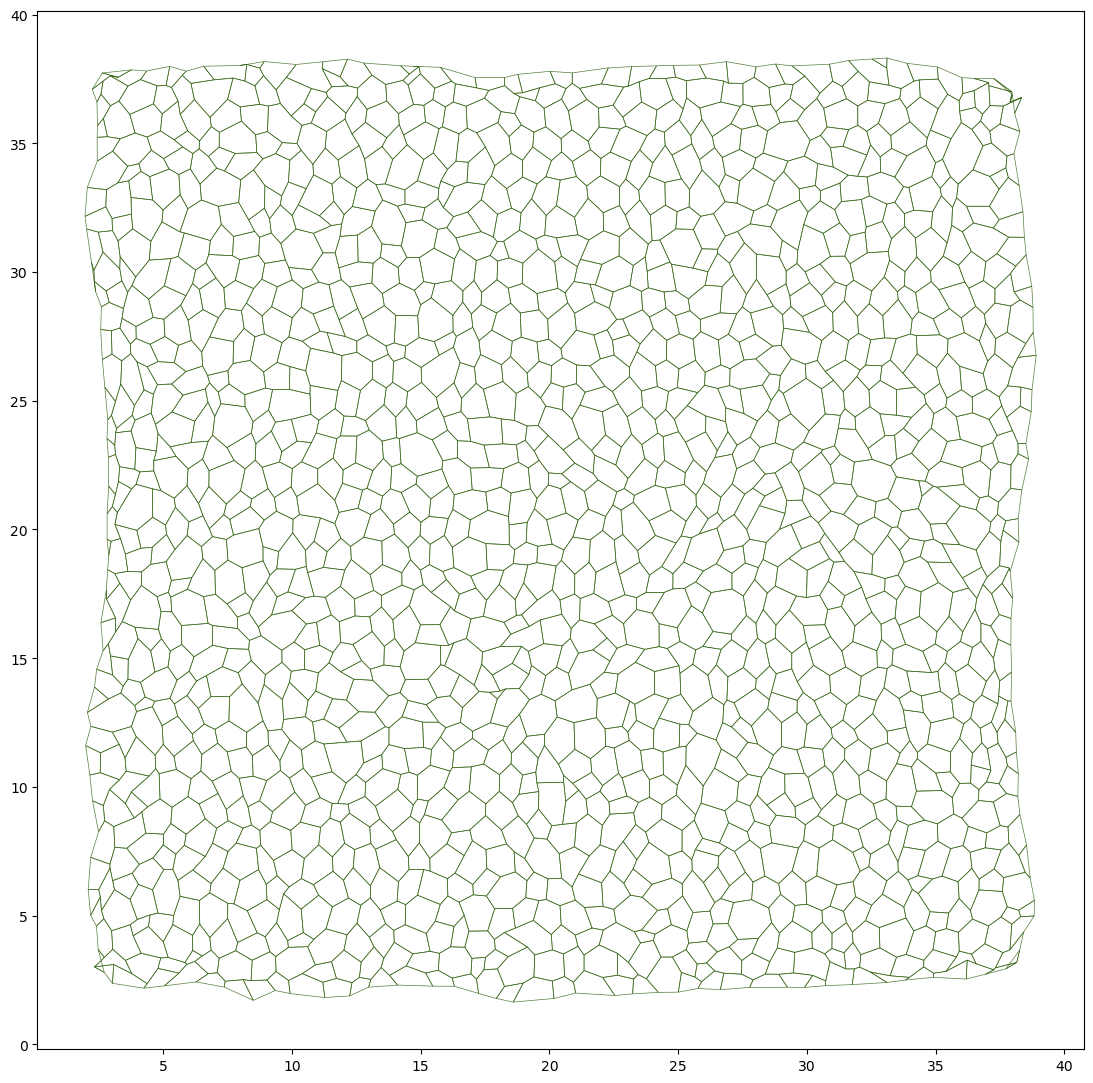

In [5]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()

In [6]:
cellDivision.ln_divide_FRCs(cellmap_H, "length", 1, energyContributions_model, geom, history_H)

      trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
3720  1466  0.713607  1.157982   773  1465 -0.874212 -0.759392  30.546567   
7097  2498  0.654095  1.155273   741  2218 -0.898355  0.726371  35.952483   
29      60  0.558490  1.150710   270    56 -0.863414 -0.760691  10.105920   
3231  1299  0.387213  1.127449   896     1 -0.278741  1.092449   4.253220   
762    510  0.776940  1.123437   346   503  0.318268 -1.077412  11.233096   
6266  1586  0.503068  1.118673   220  1584  0.334774  1.067406  35.248315   
1651   854  0.777095  1.107145   825   433  0.949082  0.570099   7.471996   
3429  1385  0.774848  1.105472   710   172 -0.015554  1.105363   4.588863   
5145  1972  0.558459  1.100511   872  1969 -0.250269  1.071676  17.684233   
2121   980  0.447178  1.099761   385   978 -0.948185 -0.557153  13.625281   
5105  1957  0.543378  1.098097   142   295  1.033097  0.372195  32.815186   

KeyError: "None of ['vert'] are in the columns"

In [ ]:
def apoptosis_one_FRC_drop(cellmap, condition):
    
    # Find non-border edges
    edges_without_opposites_indices, border_edges_indices = cellDivision.edges_list_without_opposites(cellmap)
    
    # Choose edge to remove from non-border edges
    edge_to_remove = cellmap.edge_df[~cellmap.edge_df.index.isin(border_edges_indices)][condition].nlargest(1).index.tolist()
    
    srce, trgt = cellmap.edge_df.loc[edge_to_remove[0], ["srce", "trgt"]]
    opposites = cellmap.edge_df[
    (cellmap.edge_df["srce"] == trgt) & (cellmap.edge_df["trgt"] == srce)]
    opp_edge = opposites.index

    
    # Remove the edge_to_remove from edge_df
    cellmap.edge_df = cellmap.edge_df[~cellmap.edge_df.index.isin(edge_to_remove)]
    cellmap.edge_df = cellmap.edge_df[~cellmap.edge_df.index.isin(opp_edge)]

    print('Apoptosis completed')
    # Reset index and topology (adjust as needed)
    cellmap.reset_index()
    cellmap.reset_topo()
    
    # Update geometry
    geom.update_all(cellmap)
    
    energyContributions_model.compute_energy(cellmap_H)
    vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, 40)

    
    return edge_to_remove
    

In [ ]:
num_of_loops = 200

loops = set()

for i in range(1, num_of_loops + 1): 
    cellDivision.ln_divide_one_FRC(cellmap_H, "length", energyContributions_model) 
    apoptosis_one_FRC_drop(cellmap_H, "length")
    loops.add(i)
    print(len(loops))
    if len(loops) == num_of_loops:
        break

In [ ]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()

In [ ]:
def apoptosis_one_FRC_merge_vertices(cellmap, condition):
    
    # Find non-border edges
    edges_without_opposites_indices, border_edges_indices = cellDivision.edges_list_without_opposites(cellmap)
    
    # Choose edge to remove from non-border edges
    edge_to_remove = cellmap_H.edge_df.loc[edges_without_opposites_indices]["length"].idxmin()

    
    # Remove the edge_to_remove from edge_df
    collapse_edge(cellmap, edge_to_remove, allow_two_sided=False)
    cellmap_H.update_rank()
    
    # Reset index and topology (adjust as needed)
    cellmap.reset_index()
    cellmap.reset_topo()
    
    # Update geometry
    geom.update_all(cellmap)
    
    print('Apoptosis completed')
    
    energyContributions_model.compute_energy(cellmap_H)
    vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, 40)

    return edge_to_remove
    

In [ ]:
num_of_loops = 200

loops = set()

for i in range(1, num_of_loops + 1): 
    cellDivision.ln_divide_one_FRC(cellmap_H, "length", energyContributions_model) 
    apoptosis_one_FRC_merge_vertices(cellmap_H, "length")
    loops.add(i)
    print(len(loops))
    if len(loops) == num_of_loops:
        break

In [ ]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show()